# Panel de Visualización de datos AirBnB Sidney

## Herramienta para el análisis, visualización y predicción de datos de alquileres de piso para uso vacacional en la ciudad de Sidney (Australia).

### 1. Importar librerías a utilizar en el análisis de datos y visualización

In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pan
import random
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import itertools as it
    

### 2. Importar base de datos .CSV

In [2]:
pan.read_csv ('sydney_airbnb.csv')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,NaN,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,NaN,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,NaN,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,NaN,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,NaN,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36657,30592081,The top floor paradise,229475098,Sharney,NaN,Woollahra,-33.874940,151.259375,Entire home/apt,190,10,0,NaN,NaN,1,172
36658,30592161,Sydney harbour catamaran sailing. Parties for 10,223580521,Blake,NaN,Canada Bay,-33.847841,151.149573,Entire home/apt,900,1,0,NaN,NaN,1,168
36659,30592248,Double Room built-in a large and bright apartment,119396721,Nelson,NaN,Strathfield,-33.863719,151.081721,Private room,46,4,0,NaN,NaN,1,11
36660,30592505,Bright Modern apartment in a Premiere location,229479027,Sofei & Kelvin,NaN,Rockdale,-33.929960,151.150659,Entire home/apt,170,2,0,NaN,NaN,1,89


### 3.  Asignar la base de datos a un DataFrame (df)

In [3]:
df = pan.read_csv ('sydney_airbnb.csv')

### 4. Exploración inicial de datos

> #### 4.1. Tipo de objetos (int,string, object, boolean, range).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36662 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36662 non-null  int64  
 1   name                            36650 non-null  object 
 2   host_id                         36662 non-null  int64  
 3   host_name                       36656 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36662 non-null  object 
 6   latitude                        36662 non-null  float64
 7   longitude                       36662 non-null  float64
 8   room_type                       36662 non-null  object 
 9   price                           36662 non-null  int64  
 10  minimum_nights                  36662 non-null  int64  
 11  number_of_reviews               36662 non-null  int64  
 12  last_review                     

> #### 4.2. Nombre y tipo de variables (columnas).

In [5]:
categoricas = ["id", "host_id", "name", "host_name", "neighbourhood", "room_type", "last_review"] 

numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

> #### 4.3. Información de filas (primeras y últimas).

In [6]:
df.isnull().sum()

id                                    0
name                                 12
host_id                               0
host_name                             6
neighbourhood_group               36662
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       11937
reviews_per_month                 11937
calculated_host_listings_count        0
availability_365                      0
dtype: int64

> #### 4.5. Datos duplicados (conteo e identificación).

In [7]:
df_dup = df[df.duplicated()]
len(df_dup)

0

### 5. Ingeniería de características

Borramos la columna inservible

In [8]:
df_filtrado=df.drop( ["neighbourhood_group"] ,axis = 1 )

### 6. Visualización de datos

<AxesSubplot:>

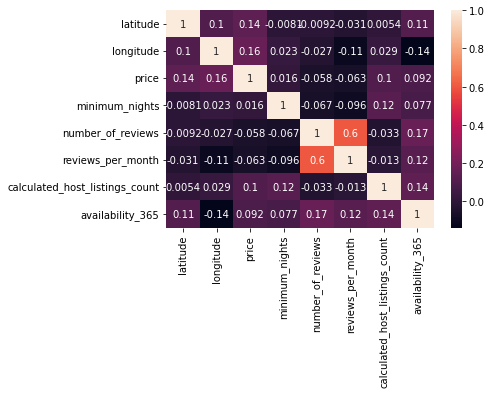

In [9]:
sns.heatmap(df_filtrado[numericas].corr(), annot=True)

### 7. Análisis estadístico de datos

In [11]:
df[numericas].describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,36662.000000,36662.000000,36662.000000,36662.000000,36662.000000,24725.000000,36662.000000,36662.000000
mean,-33.863112,151.204259,207.689597,5.096885,12.185178,1.139057,7.115106,97.387595
std,0.071501,0.083529,323.818795,15.664862,28.652548,1.536521,24.611284,122.969054
min,-34.135212,150.642903,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,-33.898444,151.179678,80.000000,1.000000,0.000000,0.140000,1.000000,0.000000
50%,-33.882486,151.215923,136.000000,2.000000,2.000000,0.490000,1.000000,36.000000
75%,-33.832072,151.261413,223.000000,5.000000,9.000000,1.520000,2.000000,165.000000
max,-33.389728,151.339811,14999.000000,1000.000000,493.000000,15.180000,197.000000,365.000000


### Panel de Visualización de datos (link Streamlit)

### Tablero de trabajo (desarrollo del proyecto) : Link Trolle

> *Mapeo de ubicaciones de los inmuebles AirBnB a arrendar en Sidney*

**Ejemplo con bicicleterias de Buenos Aires Argentina**

dataset de bicicleterías de Ciudad de Buenos Aires
descargado desde https://data.buenosaires.gob.ar/dataset/bicicleterias

bici = pd.read_csv('data/bicicleterias.csv', sep=';')
bici.head()

corregimos el campo de coordenadas del dataset.

def coord(c):
    coor = re.findall(r'-?\d+\.\d{7}', c)
    coords = [float(s) for s in coor]
    return coords[::-1]

bici['WKT'] = bici['WKT'].apply(coord)

filtramos solo las bicicleterías de palermo

bici_palermo = bici[bici.BARRIO == 'PALERMO'][['WKT', 'NOMBRE']]

creamos el mapa con folium

mapa = folium.Map(location=[-34.588889, -58.430556], zoom_start=13)

agregamos los markers con el nombre de cada bicicletería.

for index, row in bici_palermo.iterrows():
    mapa.simple_marker(row['WKT'], 
                   popup=row['NOMBRE'], marker_color='red',
                   marker_icon='info-sign')
    
    
visualizamos el mapa con los markers

mapa




In [12]:
# Ejemplos básicos de Follium

import folium

m = folium.Map(location=[40.965, -5.664])
m

ModuleNotFoundError: No module named 'folium'

In [ ]:
folium.Map(
    location=[40.965, -5.664],
    tiles='Stamen Toner',
    zoom_start=16
)

In [ ]:
m = folium.Map(
    location=[40.965, -5.664],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'plaza Mayor'

folium.Marker([40.965, -5.664], popup='Plaza Mayor', tooltip=tooltip).add_to(m)


m

In [ ]:
host_name = df.host_name.value_counts().rename_axis('Host_name').reset_index(name='Número de inmuebles AirBnB')
host_name

# Mapa interactivo de Sydney Australia (follium)

**Información de Sydney Australia**

*Coordenadas geográficas de Sídney* 	

Latitud: -33.8667, 

Longitud: 151.2 33° 52′ 0″ Sur, 
          151° 12′ 0″ Este

In [ ]:
import folium

m = folium.Map(location=[-33.8667,151.2])
m

  **Stamen Toner (tesela raster)**

In [ ]:
folium.Map(
    location=[-33.86785,151.20732],
    tiles='Stamen Toner',
    zoom_start=16
)

**Stamen Terrain (tesela raster)**

In [ ]:
m = folium.Map(
    location=[-33.86785,151.20732],
    zoom_start=12,
    tiles='Stamen Terrain'
)

tooltip = 'Ópera de Sidney'

folium.Marker([-33.8567844, 151.2152967], popup='Ópera de Sidney', tooltip=tooltip).add_to(m)


m


#Ópera de Sidney

#Latitud: -33.8567844. Longitud: 151.2152967 

In [ ]:
import geopandas as gpd

In [ ]:
airbnb = "sydney_airbnb.csv"
map_data = gpd.read_file(airbnb)
map_data.head()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

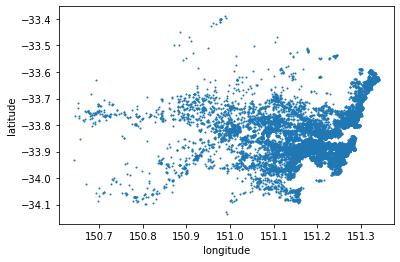

In [10]:
df_filtrado.plot.scatter(x = 'longitude', y = 'latitude', s = 1)

* Para generar un nuevo set de datos sin las filas con con gastos de cliente menor a 10 euros.
Se eliminarán todas las filas con precios menor a 4000€.
Primero buscamos el índice de todas las filas con gastos de cliente menor a 4000€ y luego eliminamos las filas usando el método drop().

In [11]:
#Estos son los índices de las 12 filas con gastos de cliente menor a 10 euros.
df_idx=df_filtrado[df_filtrado["price"]>=1500].index
df_idx

Int64Index([   28,   247,   690,   776,  1014,  1630,  1631,  1965,  2032,
             2385,
            ...
            34773, 34976, 35108, 35189, 35407, 35484, 35667, 35729, 36033,
            36153],
           dtype='int64', length=278)

In [12]:
#Generamos el nuevo data set substrayendo las filas filtradas del DataFrame completo.
df_fil2=df_filtrado.drop(df_idx)

df_fil2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36657,30592081,The top floor paradise,229475098,Sharney,Woollahra,-33.874940,151.259375,Entire home/apt,190,10,0,NaN,NaN,1,172
36658,30592161,Sydney harbour catamaran sailing. Parties for 10,223580521,Blake,Canada Bay,-33.847841,151.149573,Entire home/apt,900,1,0,NaN,NaN,1,168
36659,30592248,Double Room built-in a large and bright apartment,119396721,Nelson,Strathfield,-33.863719,151.081721,Private room,46,4,0,NaN,NaN,1,11
36660,30592505,Bright Modern apartment in a Premiere location,229479027,Sofei & Kelvin,Rockdale,-33.929960,151.150659,Entire home/apt,170,2,0,NaN,NaN,1,89


In [13]:
df_fil2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36384 entries, 0 to 36661
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36384 non-null  int64  
 1   name                            36372 non-null  object 
 2   host_id                         36384 non-null  int64  
 3   host_name                       36378 non-null  object 
 4   neighbourhood                   36384 non-null  object 
 5   latitude                        36384 non-null  float64
 6   longitude                       36384 non-null  float64
 7   room_type                       36384 non-null  object 
 8   price                           36384 non-null  int64  
 9   minimum_nights                  36384 non-null  int64  
 10  number_of_reviews               36384 non-null  int64  
 11  last_review                     24634 non-null  object 
 12  reviews_per_month               

<AxesSubplot:xlabel='longitude', ylabel='price'>

<Figure size 129600x72000 with 0 Axes>

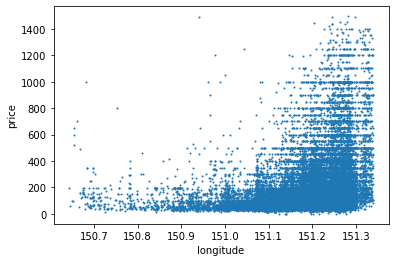

In [14]:
plt.figure(figsize=(1800,1000))
df_fil2.plot.scatter(x = 'longitude', y = 'price', s = 1)

In [15]:
categoricas

['id',
 'host_id',
 'name',
 'host_name',
 'neighbourhood',
 'room_type',
 'last_review']

In [16]:
pan.plotting.scatter_matrix(df_fil_noches[numericas], figsize=(20,20))
plt.show

NameError: name 'df_fil_noches' is not defined

<AxesSubplot:>

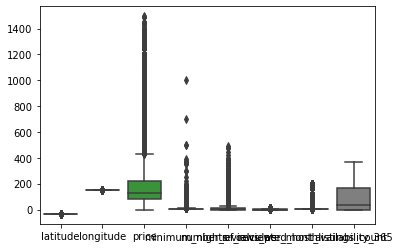

In [17]:
sns.boxplot(data=df_fil2[numericas])

<AxesSubplot:xlabel='price', ylabel='latitude'>

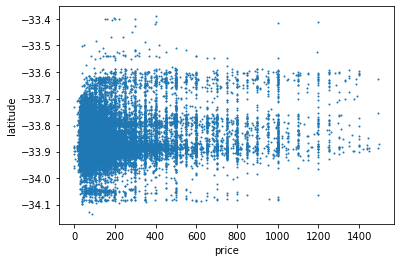

In [18]:
df_fil2.plot.scatter(x = 'price', y = 'latitude', s = 1)

<AxesSubplot:xlabel='neighbourhood', ylabel='price'>

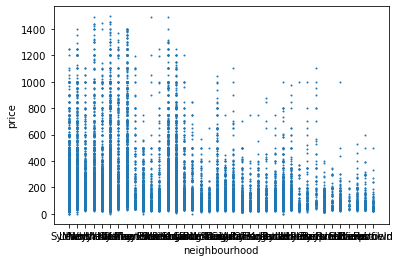

In [19]:
df_fil2.plot.scatter(x = 'neighbourhood', y = 'price', s = 1)

<AxesSubplot:xlabel='price', ylabel='room_type'>

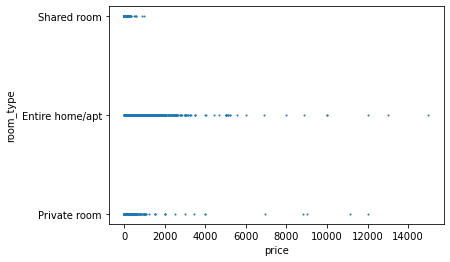

In [20]:
df_filtrado.plot.scatter(x = 'price', y = 'room_type', s = 1)

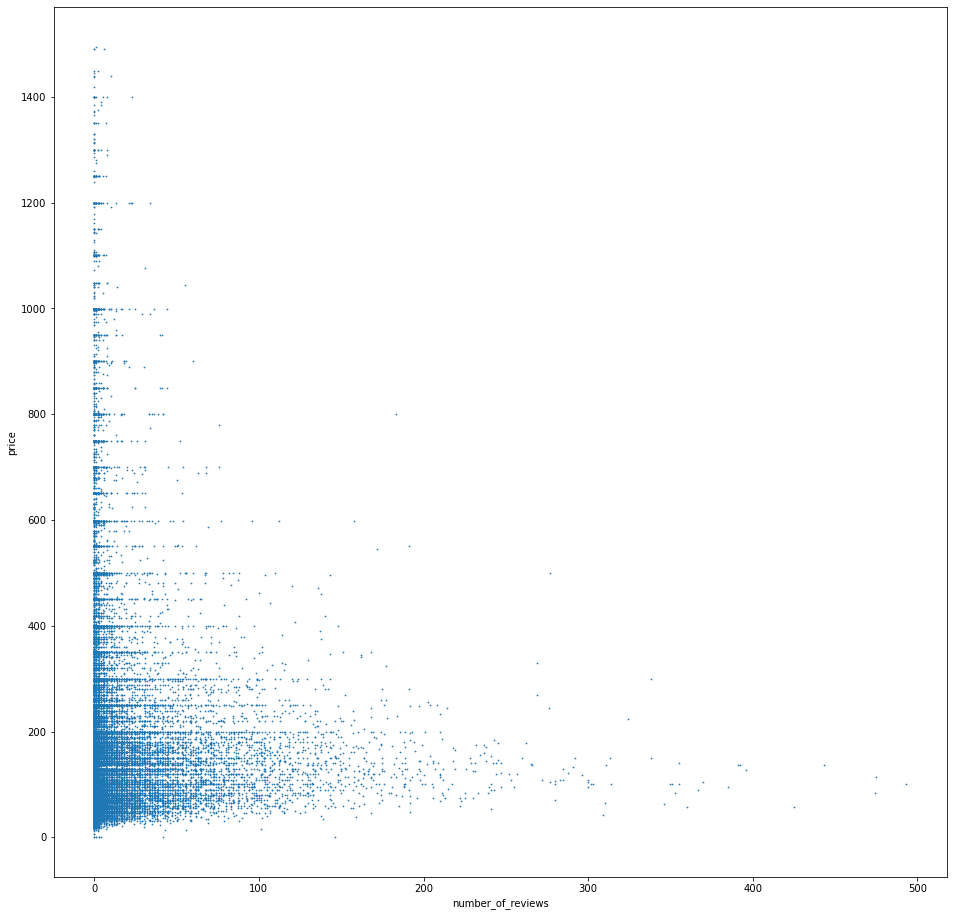

In [21]:
df_fil2.plot.scatter(x = 'number_of_reviews', y = 'price', s = 0.5, figsize=(16,16))
plt.show()

* No podemos filtrar con valores de minimo de noches <= 360, nos aparece error en [7692]
* **No entendemos porque**

In [25]:
# df_idx2=df_filtrado[df_filtrado["minimum_nights"]>=200].index
# df_idx2

In [22]:
df.loc[7692]

id                                                   9955947
name                              Entire 1 bedroom apartment
host_id                                             20286477
host_name                                           Shelinna
neighbourhood_group                                      NaN
neighbourhood                                        Hornsby
latitude                                          -33.706732
longitude                                          151.10457
room_type                                    Entire home/apt
price                                                   2000
minimum_nights                                           360
number_of_reviews                                          4
last_review                                       2016-02-18
reviews_per_month                                       0.11
calculated_host_listings_count                             1
availability_365                                           0
Name: 7692, dtype: objec

In [23]:
df_idx2=df_filtrado[df_filtrado["minimum_nights"]>=361].index
df_idx2

Int64Index([  274,   901,  1154,  4349,  4515,  7817,  8873, 10248, 11418,
            12882, 13185, 13979, 18189, 18672, 20355, 20906, 21853, 23175,
            25008, 25014, 25015, 32496],
           dtype='int64')

In [24]:
df_fil_noches=df_fil2.drop(df_idx2)
df_fil_noches

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36657,30592081,The top floor paradise,229475098,Sharney,Woollahra,-33.874940,151.259375,Entire home/apt,190,10,0,NaN,NaN,1,172
36658,30592161,Sydney harbour catamaran sailing. Parties for 10,223580521,Blake,Canada Bay,-33.847841,151.149573,Entire home/apt,900,1,0,NaN,NaN,1,168
36659,30592248,Double Room built-in a large and bright apartment,119396721,Nelson,Strathfield,-33.863719,151.081721,Private room,46,4,0,NaN,NaN,1,11
36660,30592505,Bright Modern apartment in a Premiere location,229479027,Sofei & Kelvin,Rockdale,-33.929960,151.150659,Entire home/apt,170,2,0,NaN,NaN,1,89


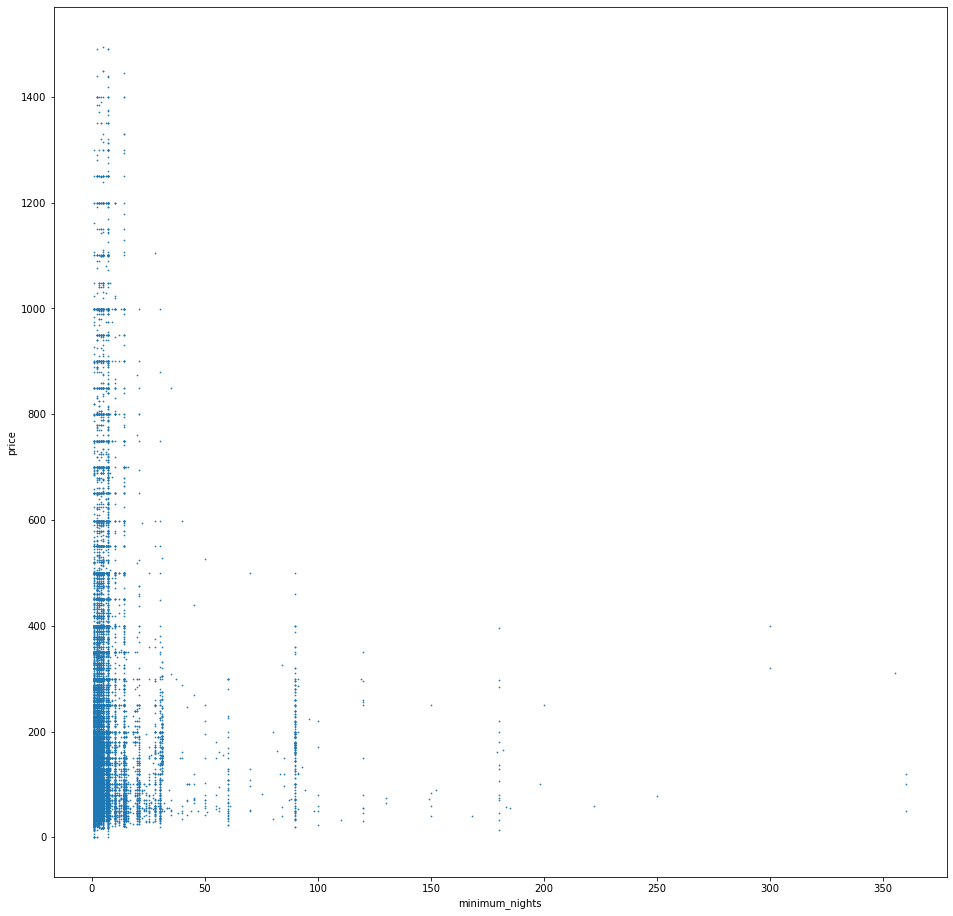

In [25]:
df_fil_noches.plot.scatter(x = 'minimum_nights', y = 'price', s =0.5,  figsize=(16,16))
plt.show()

* Hacer grafico y correlacion para "numero de noches" y "'calculated_host_listings_count'" 
* se espera una relacion menor numero de noches mayor numero de 'calculated_host_listings_count'.

In [26]:
df_noches=df_fil_noches[df_fil_noches["minimum_nights"]>=100].index
df_noches

Int64Index([  161,   188,   615,   849,   929,  1257,  1291,  1390,  1441,
             2602,  2751,  4059,  4116,  4426,  5226,  5327,  5929,  6510,
             7602,  8355,  8805,  9082,  9299, 10382, 10383, 10396, 10474,
            11690, 12522, 13696, 13724, 15164, 16023, 16390, 17043, 17232,
            19695, 20692, 21498, 22080, 22348, 22386, 23891, 24456, 25037,
            25461, 25914, 27473, 27958, 28146, 29536, 30152, 30496, 33203,
            33826, 35384, 35711],
           dtype='int64')

In [27]:
df_fil_no=df_fil_noches.drop(df_noches)
df_fil_no

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,12351,Sydney City & Harbour at the door,17061,Stuart,Sydney,-33.865153,151.191896,Private room,100,2,493,2018-11-21,4.83,2,187
1,14250,Manly Harbour House,55948,Heidi,Manly,-33.800929,151.261722,Entire home/apt,471,5,1,2016-01-02,0.03,2,321
2,15253,Stunning Penthouse Apartment In Heart Of The City,59850,Morag,Sydney,-33.880455,151.216541,Private room,109,2,300,2018-11-16,3.63,2,316
3,20865,3 BED HOUSE + 1 BED STUDIO Balmain,64282,Fiona,Leichhardt,-33.859072,151.172753,Entire home/apt,450,7,15,2018-01-07,0.18,1,69
4,26174,"COZY PRIVATE ROOM, GREAT LOCATION!",110561,Amanda,Woollahra,-33.889087,151.259404,Private room,62,1,42,2018-11-23,0.45,1,140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36657,30592081,The top floor paradise,229475098,Sharney,Woollahra,-33.874940,151.259375,Entire home/apt,190,10,0,NaN,NaN,1,172
36658,30592161,Sydney harbour catamaran sailing. Parties for 10,223580521,Blake,Canada Bay,-33.847841,151.149573,Entire home/apt,900,1,0,NaN,NaN,1,168
36659,30592248,Double Room built-in a large and bright apartment,119396721,Nelson,Strathfield,-33.863719,151.081721,Private room,46,4,0,NaN,NaN,1,11
36660,30592505,Bright Modern apartment in a Premiere location,229479027,Sofei & Kelvin,Rockdale,-33.929960,151.150659,Entire home/apt,170,2,0,NaN,NaN,1,89


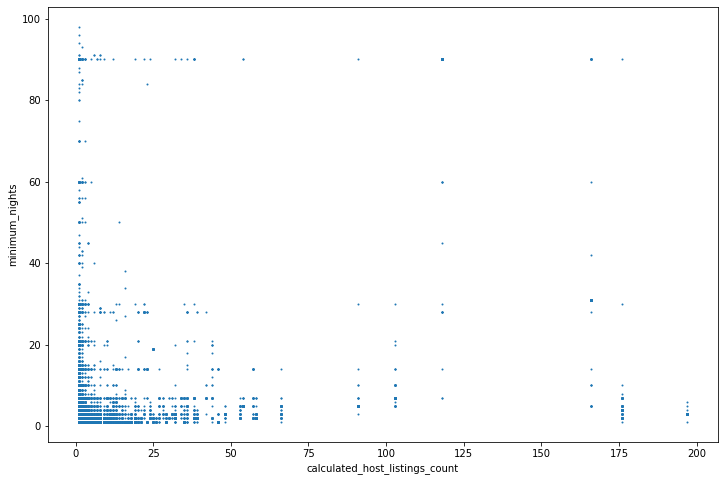

In [28]:
df_fil_no.plot.scatter(x = 'calculated_host_listings_count', y = 'minimum_nights', s = 1, figsize=(12,8))
plt.show()

* Existe un relacion inversa entre el numero minimo de noches y la cantidad de publicaciones de AirBnB de los anfitriones.
* Se observa que la mayoria de anfitriones recurrentes son menos que los esporadicos por la agrupacion de datos en el lado izquierdo de la grafica. 

# REVISAR

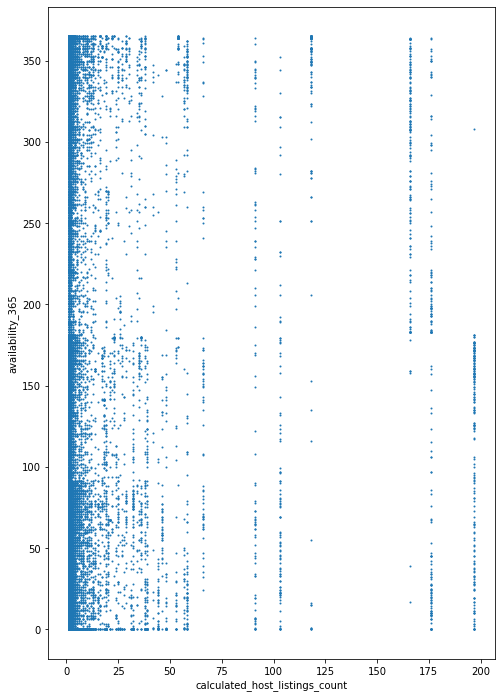

In [30]:
df_fil_no.plot.scatter(x = 'calculated_host_listings_count', y = 'availability_365', s = 1, figsize=(8,12))
plt.show()

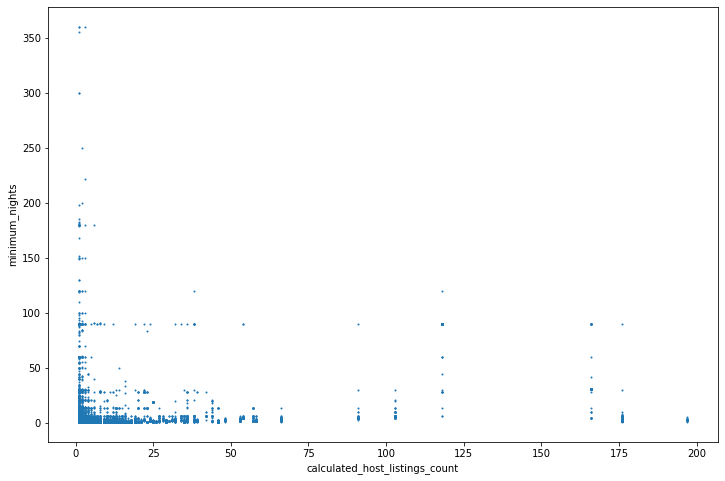

In [33]:
df_fil_noches.plot.scatter(x = 'calculated_host_listings_count', y = 'minimum_nights', s = 1, figsize=(12,8))
plt.show()

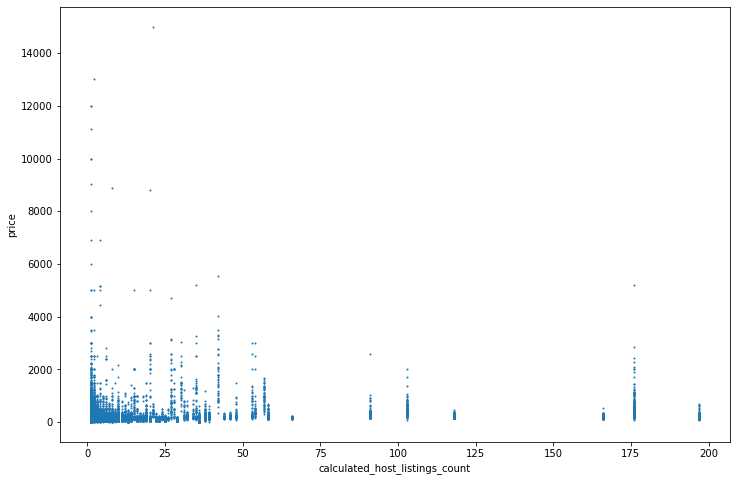

In [34]:
df_filtrado.plot.scatter(x = 'calculated_host_listings_count', y = 'price', s = 1, figsize=(12,8))
plt.show()

# revisar

<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Count'>

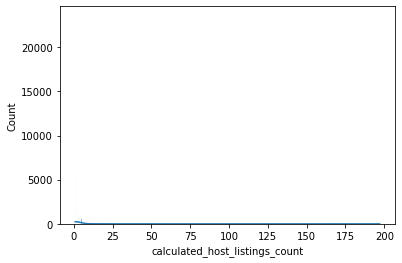

In [35]:
sns.histplot(data=df_filtrado, x="calculated_host_listings_count", kde=True)

<AxesSubplot:xlabel='availability_365', ylabel='price'>

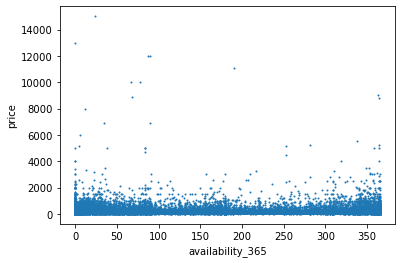

In [35]:
df_filtrado.plot.scatter(x = 'availability_365', y = 'price', s = 1)

In [36]:
# calculated_host_listings_count  availability_365

# Boxplot

df_fil_no --> Tiene filtrado numero de noches (<=100) y precio (<=1500)

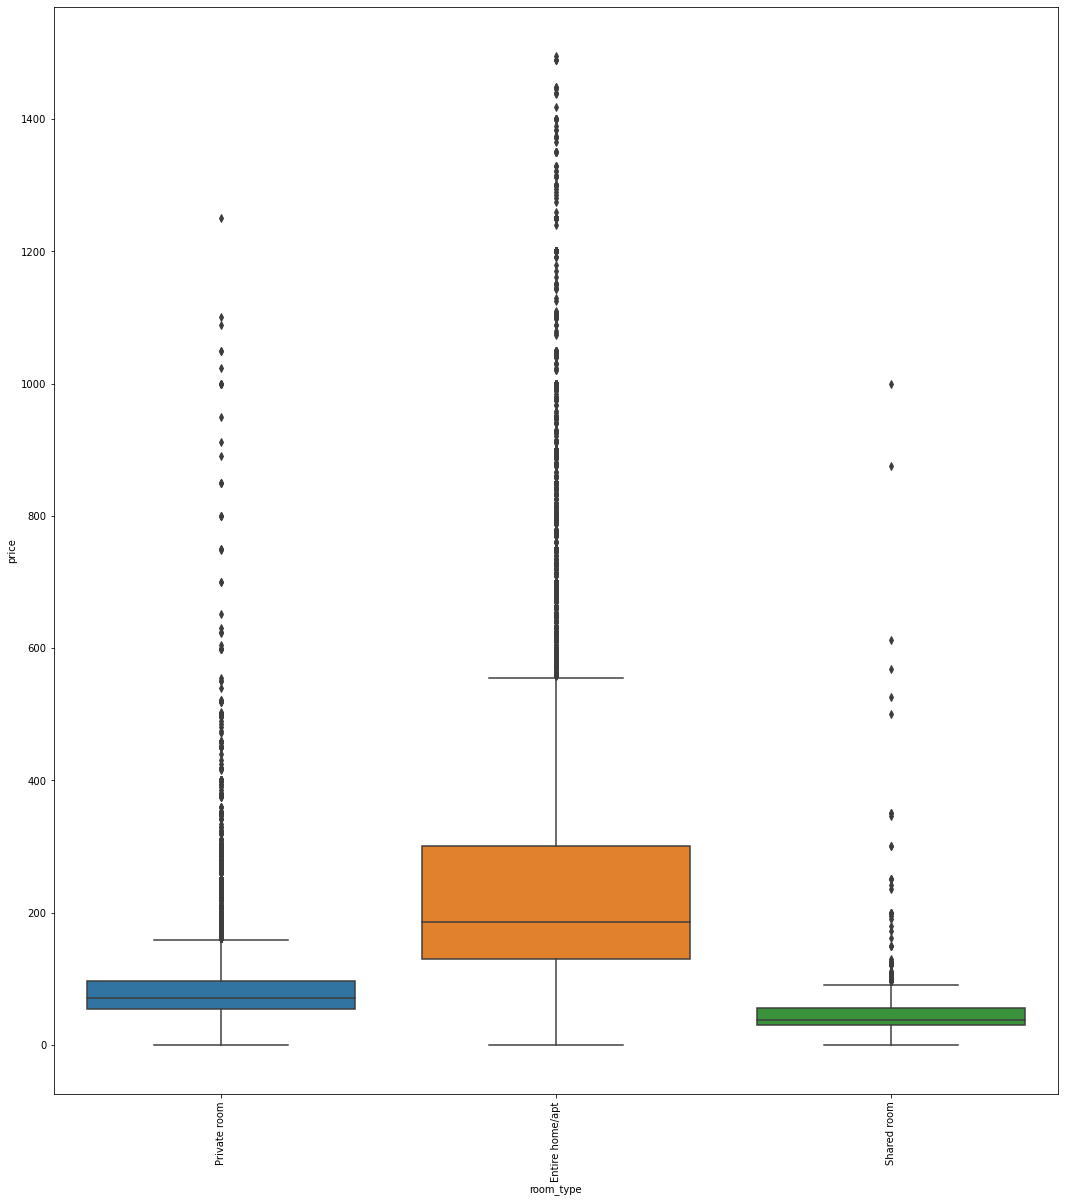

In [37]:
# Evaluando precios por país
fig, ax = plt.subplots(ncols=1, figsize=(18,20))
sns.boxplot(y='price', x='room_type', data=df_fil_no, ax=ax)
plt.xticks(rotation=90)
plt.show()

## Boxplot de todos los numerales para ver outliers y decidir que hacer con ellos

* Empiezo con la columna precio por considerarla la mas relevante

<AxesSubplot:>

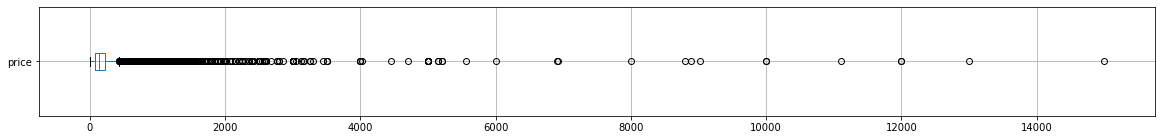

In [38]:
df.boxplot(column='price', return_type='axes', vert=False, figsize=(20,2))

* Hago un filtrado de los outliers de la columna precio

In [39]:
from scipy import stats
df_noprice = df[(np.abs(stats.zscore(df["price"])) < 3)]

In [40]:
df_noprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36229 entries, 0 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              36229 non-null  int64  
 1   name                            36217 non-null  object 
 2   host_id                         36229 non-null  int64  
 3   host_name                       36223 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   36229 non-null  object 
 6   latitude                        36229 non-null  float64
 7   longitude                       36229 non-null  float64
 8   room_type                       36229 non-null  object 
 9   price                           36229 non-null  int64  
 10  minimum_nights                  36229 non-null  int64  
 11  number_of_reviews               36229 non-null  int64  
 12  last_review                     

* Me hace una limieza de unos 400 outliers y paso a tener solo 36229 entradas en el DF
* Ahora hago una visualizacion de los datos numericos con los outliers de precio filtrados

<function matplotlib.pyplot.show(close=None, block=None)>

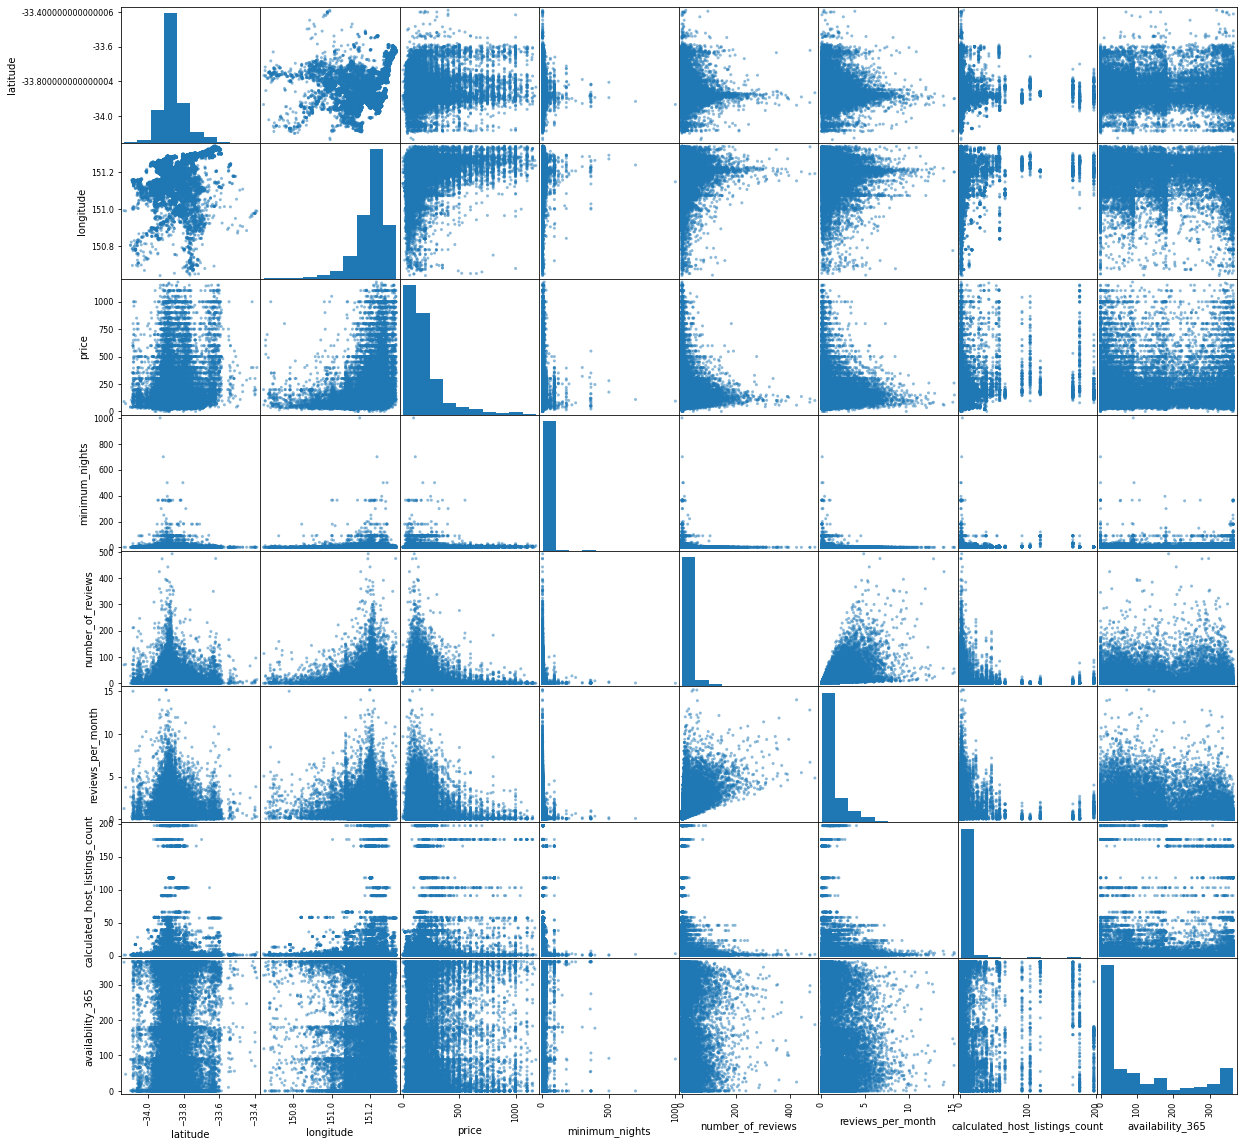

In [41]:
pan.plotting.scatter_matrix(df_noprice[numericas], figsize=(20,20))
plt.show

* Vemos que es m uy parecida a nuestro filtrado hecho por precio menor a 1500 y noches menor a 361
* Visualizo los outliers de longitud y latitud del primer DF porque predigo que no tendra muchos y puede que no sea necesario hacer un filtrado de estos

<AxesSubplot:>

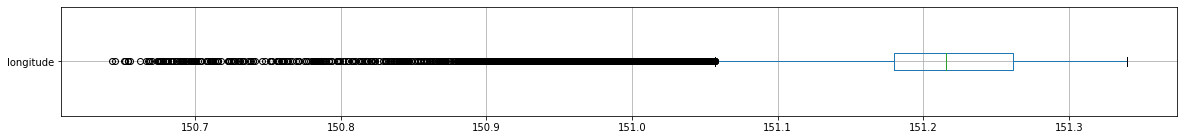

In [42]:
df.boxplot(column='longitude', return_type='axes', vert=False, figsize=(20,2))

<AxesSubplot:>

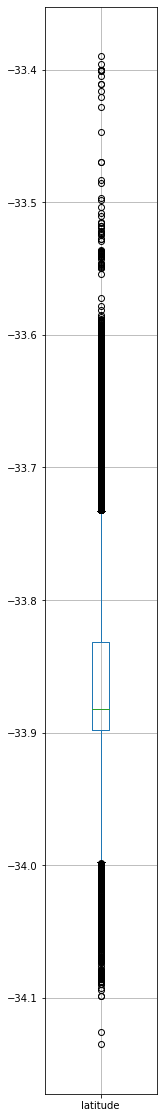

In [37]:
df.boxplot(column='latitude', return_type='axes', vert=True, figsize=(2,20))

* Veo que si que continen outliers por lo que decido esperar y comentarlos con los demas compañeros por si es relevante.
* Sido haciendo boxplot para seguir viendo outliers de los valores numericos del DF en el DF original.
* numericas = ["latitude", "longitude", "price", "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count", "availability_365"]

<AxesSubplot:>

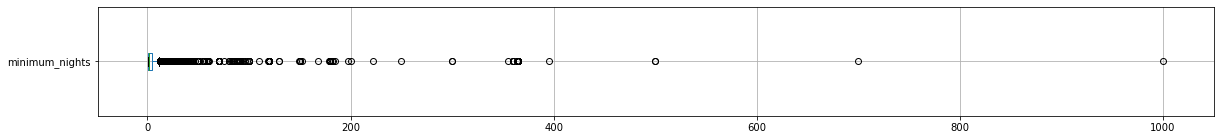

In [44]:
df.boxplot(column='minimum_nights', return_type='axes', vert=False, figsize=(20,2))

* Se puede ver en el boxplot que las noches minimas contienen un buena cantidad de outlier y estan muy esparcidos por lo que seria buena idea hacer un filtrado de estos, parece que si maximo es 1000.

<AxesSubplot:>

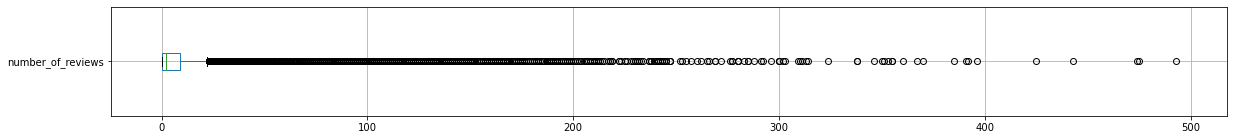

In [45]:
df.boxplot(column='number_of_reviews', return_type='axes', vert=False, figsize=(20,2))

* La columna de numero de reviews aunque mas concentrada que la anterior sigue teniendo un gran numero de outliers, parece que su maximo esta cerca de 500.

<AxesSubplot:>

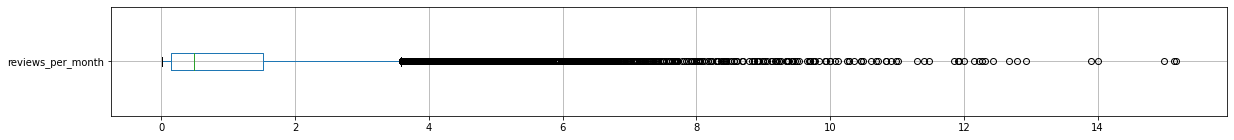

In [46]:
df.boxplot(column='reviews_per_month', return_type='axes', vert=False, figsize=(20,2))

* Aunque esta columna sea la qu emejor tiene distriuidos los datos se trata de una columna con nulos por lo que no tengo claro como de representativa puede ser.

<AxesSubplot:>

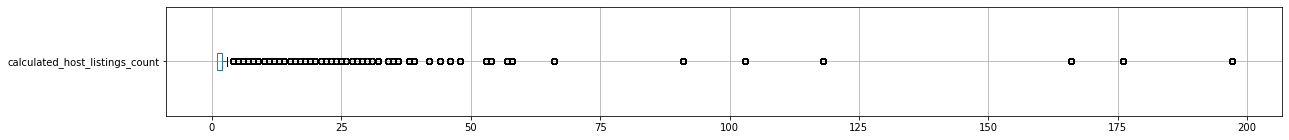

In [47]:
df.boxplot(column='calculated_host_listings_count', return_type='axes', vert=False, figsize=(20,2))

* Se ve claro que los host listin tienen pococs datos que se consideren outliers pero la concentracion esta muy dispersa.

<AxesSubplot:>

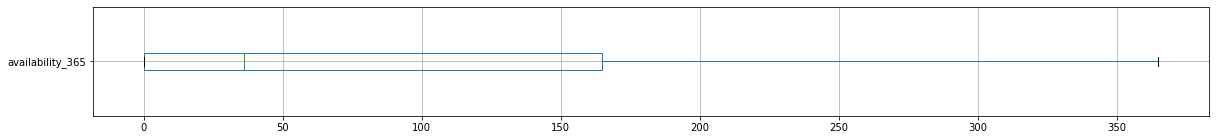

In [48]:
df.boxplot(column='availability_365', return_type='axes', vert=False, figsize=(20,2))

* Por ultimo la columna de disponibilidad no tiene outliers, aunque se puede ver que la densidad se encuentra cerca de los valores bajos, algo que podria ser esperable pues habra mas entradas cuantos menos dias tenga de alquielar pues podran volver a alquilarse aquellos que se liberan pronto mientras que los que estan mucho tiempo arrendados no se volveran a poner al mercado con tanta frecuencia.

* Pruebo a eliminar los outliers que considero mas dispersos para ver como quedaria en la distribucion, "minimum_nights", "number_of_reviews", "reviews_per_month", "calculated_host_listings_count".
* **no he podido hacerlo son reviews por mes, no se porque pero seguro tenga que ver con que tiene nulos**

In [49]:
# commo no se hacerlo de varias columnas voy a hacer una chapuza y mas adelante cuando encuentre documentacion lo cambio
df_no_out1 = df_noprice[(np.abs(stats.zscore(df_noprice["minimum_nights"])) < 3)]

In [50]:
df_no_out2 = df_no_out1[(np.abs(stats.zscore(df_no_out1["number_of_reviews"])) < 3)]

In [51]:
df_no_out_def = df_no_out2[(np.abs(stats.zscore(df_no_out2["calculated_host_listings_count"])) < 3)]

In [52]:
df_no_out_def.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34295 entries, 1 to 36661
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34295 non-null  int64  
 1   name                            34283 non-null  object 
 2   host_id                         34295 non-null  int64  
 3   host_name                       34289 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   34295 non-null  object 
 6   latitude                        34295 non-null  float64
 7   longitude                       34295 non-null  float64
 8   room_type                       34295 non-null  object 
 9   price                           34295 non-null  int64  
 10  minimum_nights                  34295 non-null  int64  
 11  number_of_reviews               34295 non-null  int64  
 12  last_review                     

<function matplotlib.pyplot.show(close=None, block=None)>

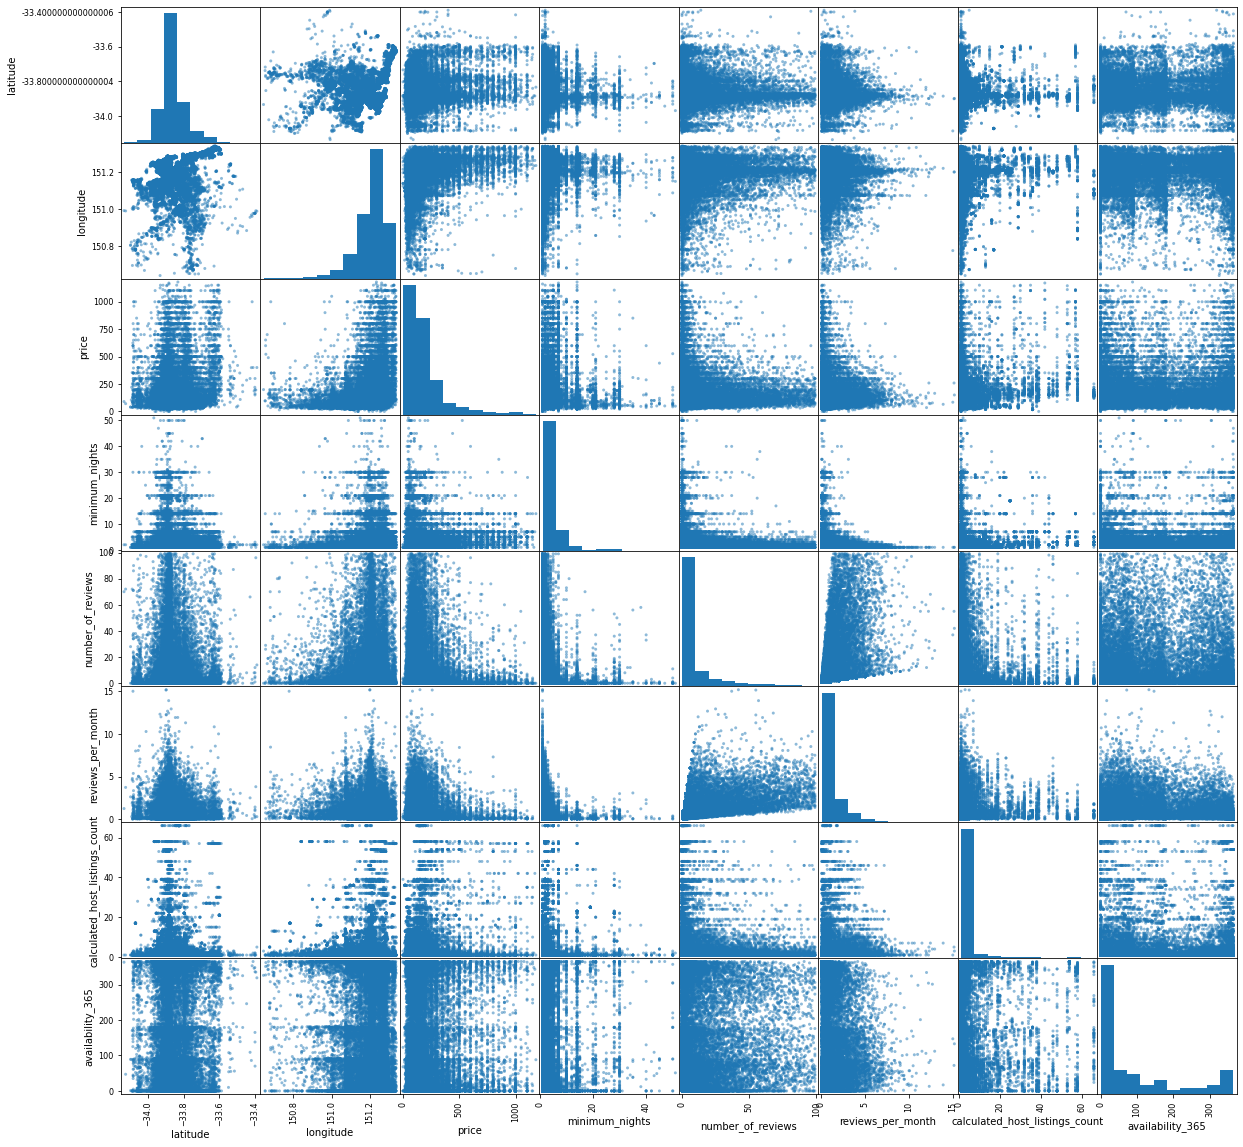

In [53]:
pan.plotting.scatter_matrix(df_no_out_def[numericas], figsize=(20,20))
plt.show